# Visualize & Analyze Tables

使用W&B表记录和可视化数据和模型预测。交互式探索您的数据：

- 精确比较 models、epochs 或单个样本之间的变化
- 了解数据中更高级别的模式
- 通过视觉样本捕获和传达您的见解

## Examples

这些报告突出了W&B表的不同用例：

- Visualize Predictions Over Time
- How to Compare Tables in Workspaces
- Image & Classification Models
- Text & Generative Language Models
- Named Entity Recognition
- AlphaFold Proteins



## Save your view

您在 run workspace、项目工作区或报告中交互的表将自动保存其视图状态。如果您应用任何表操作，然后关闭浏览器，当您下次导航到表时，表将保留上次查看的配置。

您在 artifact 上下文中交互的表将保持 stateless。

要从特定状态的工作区保存表，请将其导出到报告。您可以从任何工作区可视化面板右上角的三个点菜单（三个点→“共享面板”或“添加到报告”）中执行此操作。

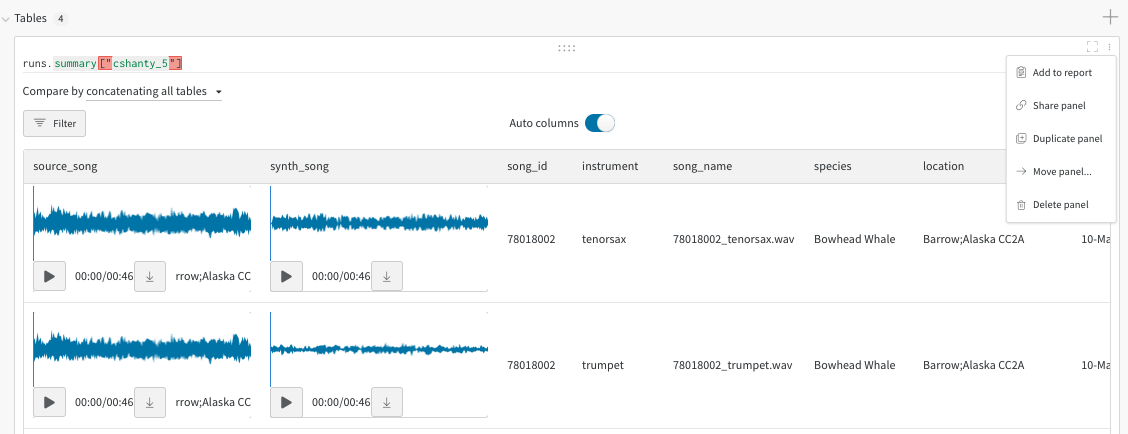

## Table interactions

### Table operations

自定义单个表格来回答具体问题，例如该模型预测的准确性是多少，错误的真实标签是什么？这些操作是

- stateless in an artifact context: 关闭浏览器窗口后，与 artifact 版本一起记录的任何表都将重置为默认状态
- stateful in a workspace or report context:  您在single run workspace、multi-run 项目工作区或报告中对表所做的任何更改都将持续存在

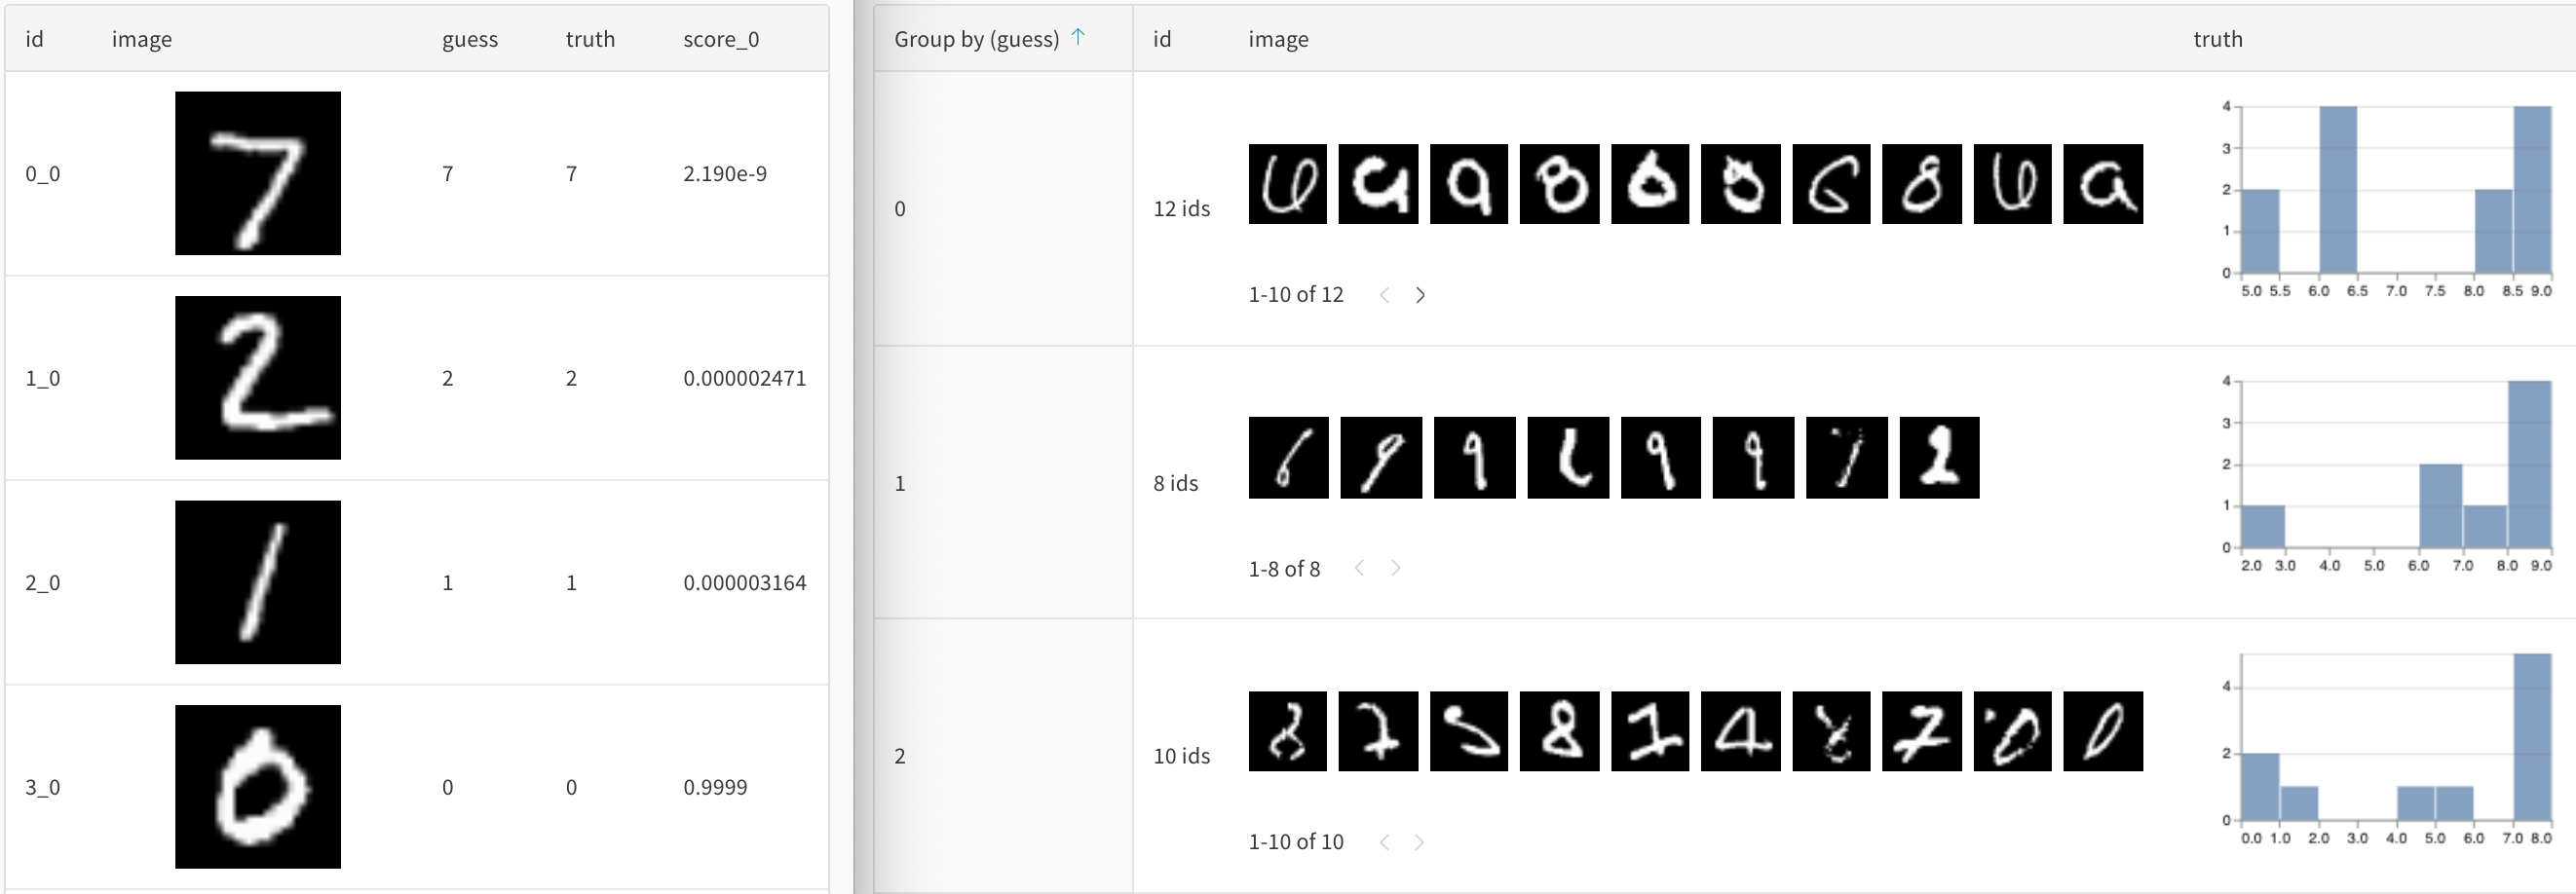

### Sort

按给定列中的值对表中的所有行进行排序。将鼠标悬停在标题上，单击三点菜单，然后选择 “Sort Asc” 或 “Sort Desc”。

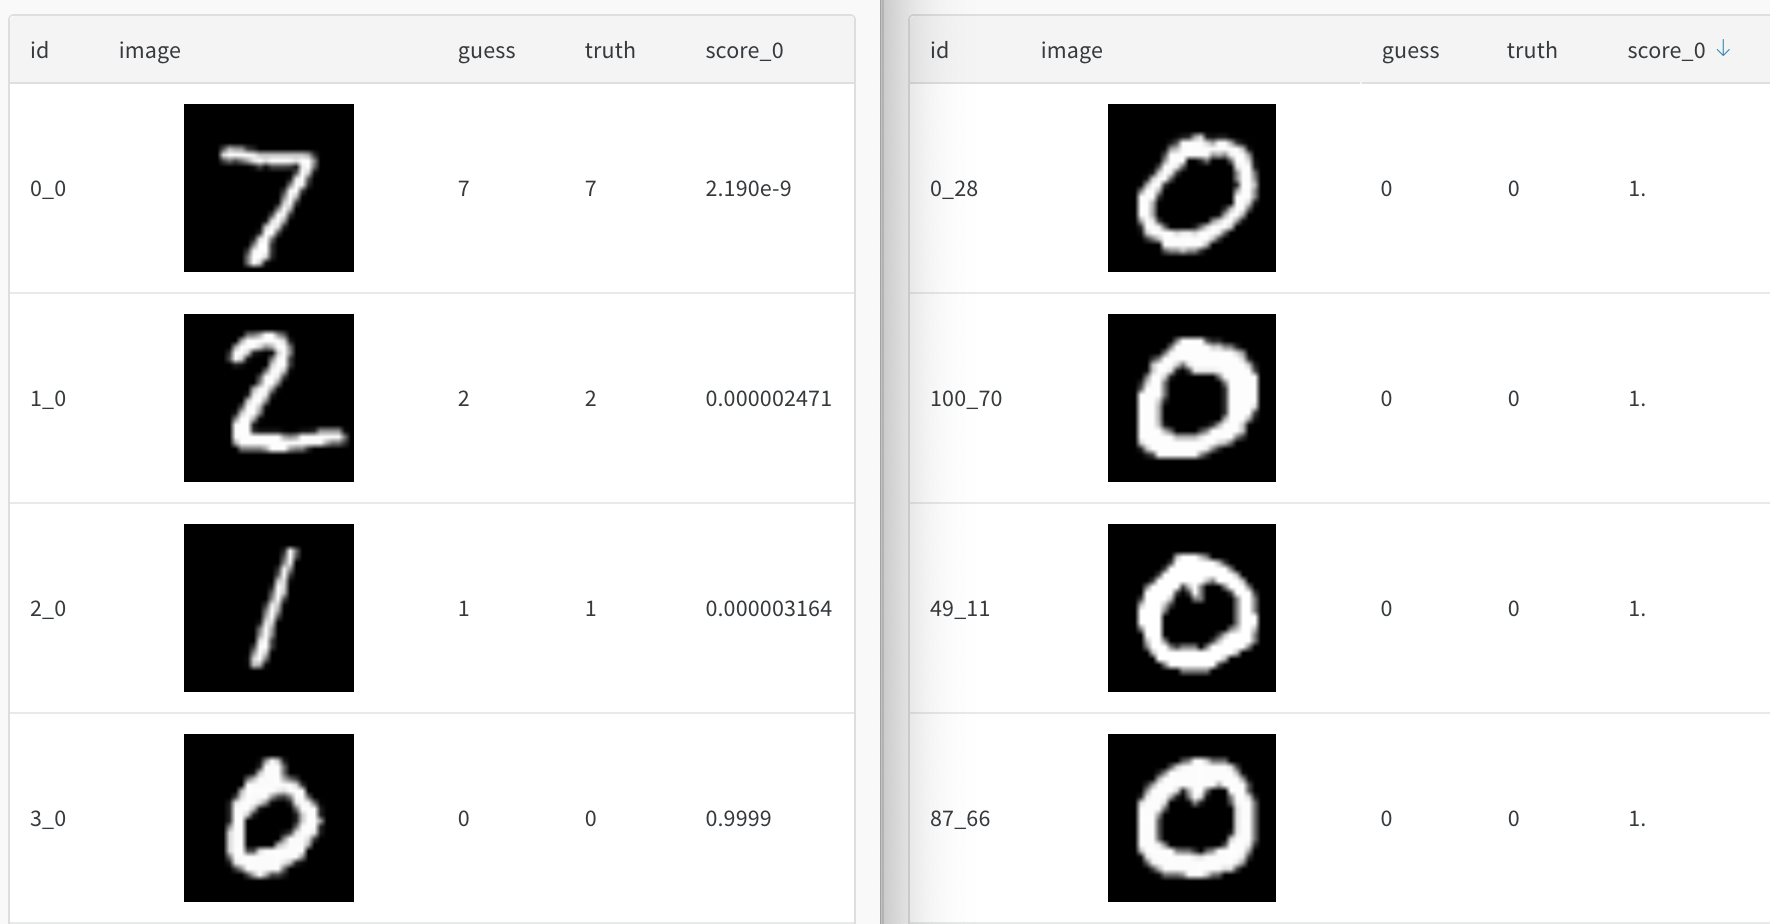

### Filter

通过左上角的过滤器按钮按表达式过滤所有行。 expression editor 使用列名和逻辑谓词结构的自动完成来显示每个术语的选项列表。您可以使用 “and” 或 “or”（有时是括号）将 multiple logical predicates  连接到一个 expression 中。

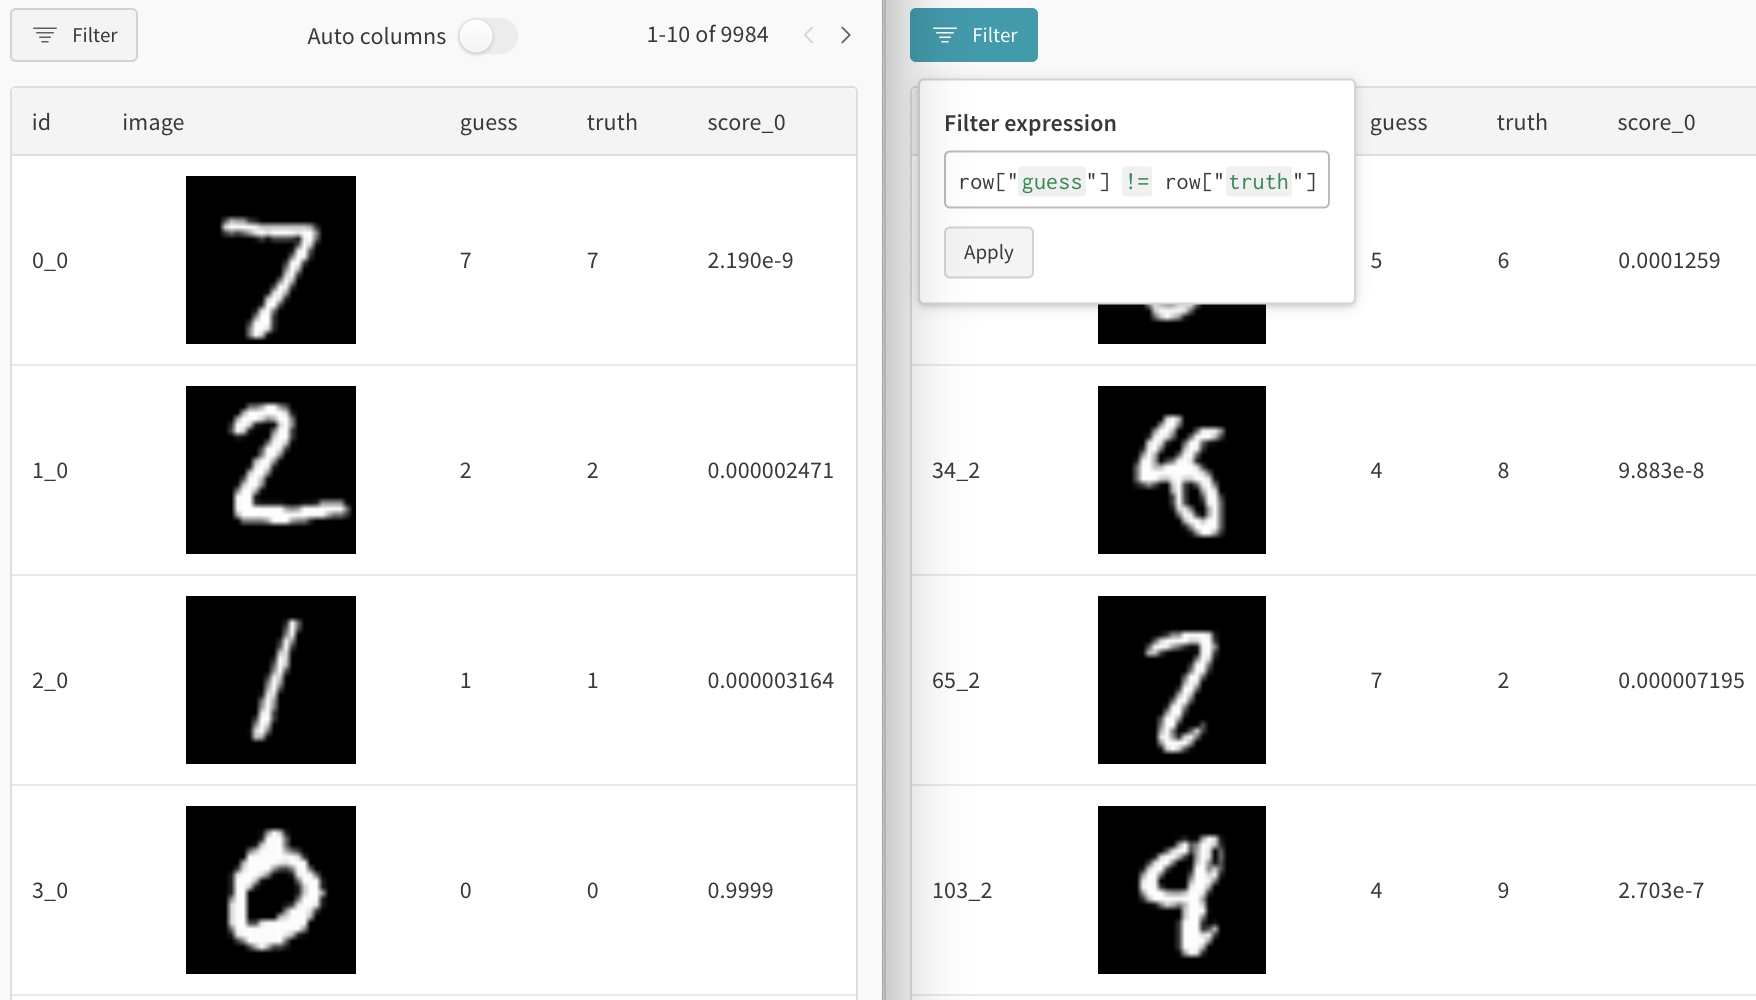

### Group

按特定列中的值对所有行进行分组（列标题中的三点菜单→“分组”）。默认情况下，这将把其他数字列转换为直方图，显示该列在组中值的分布。分组有助于了解数据中的更高层次模式。

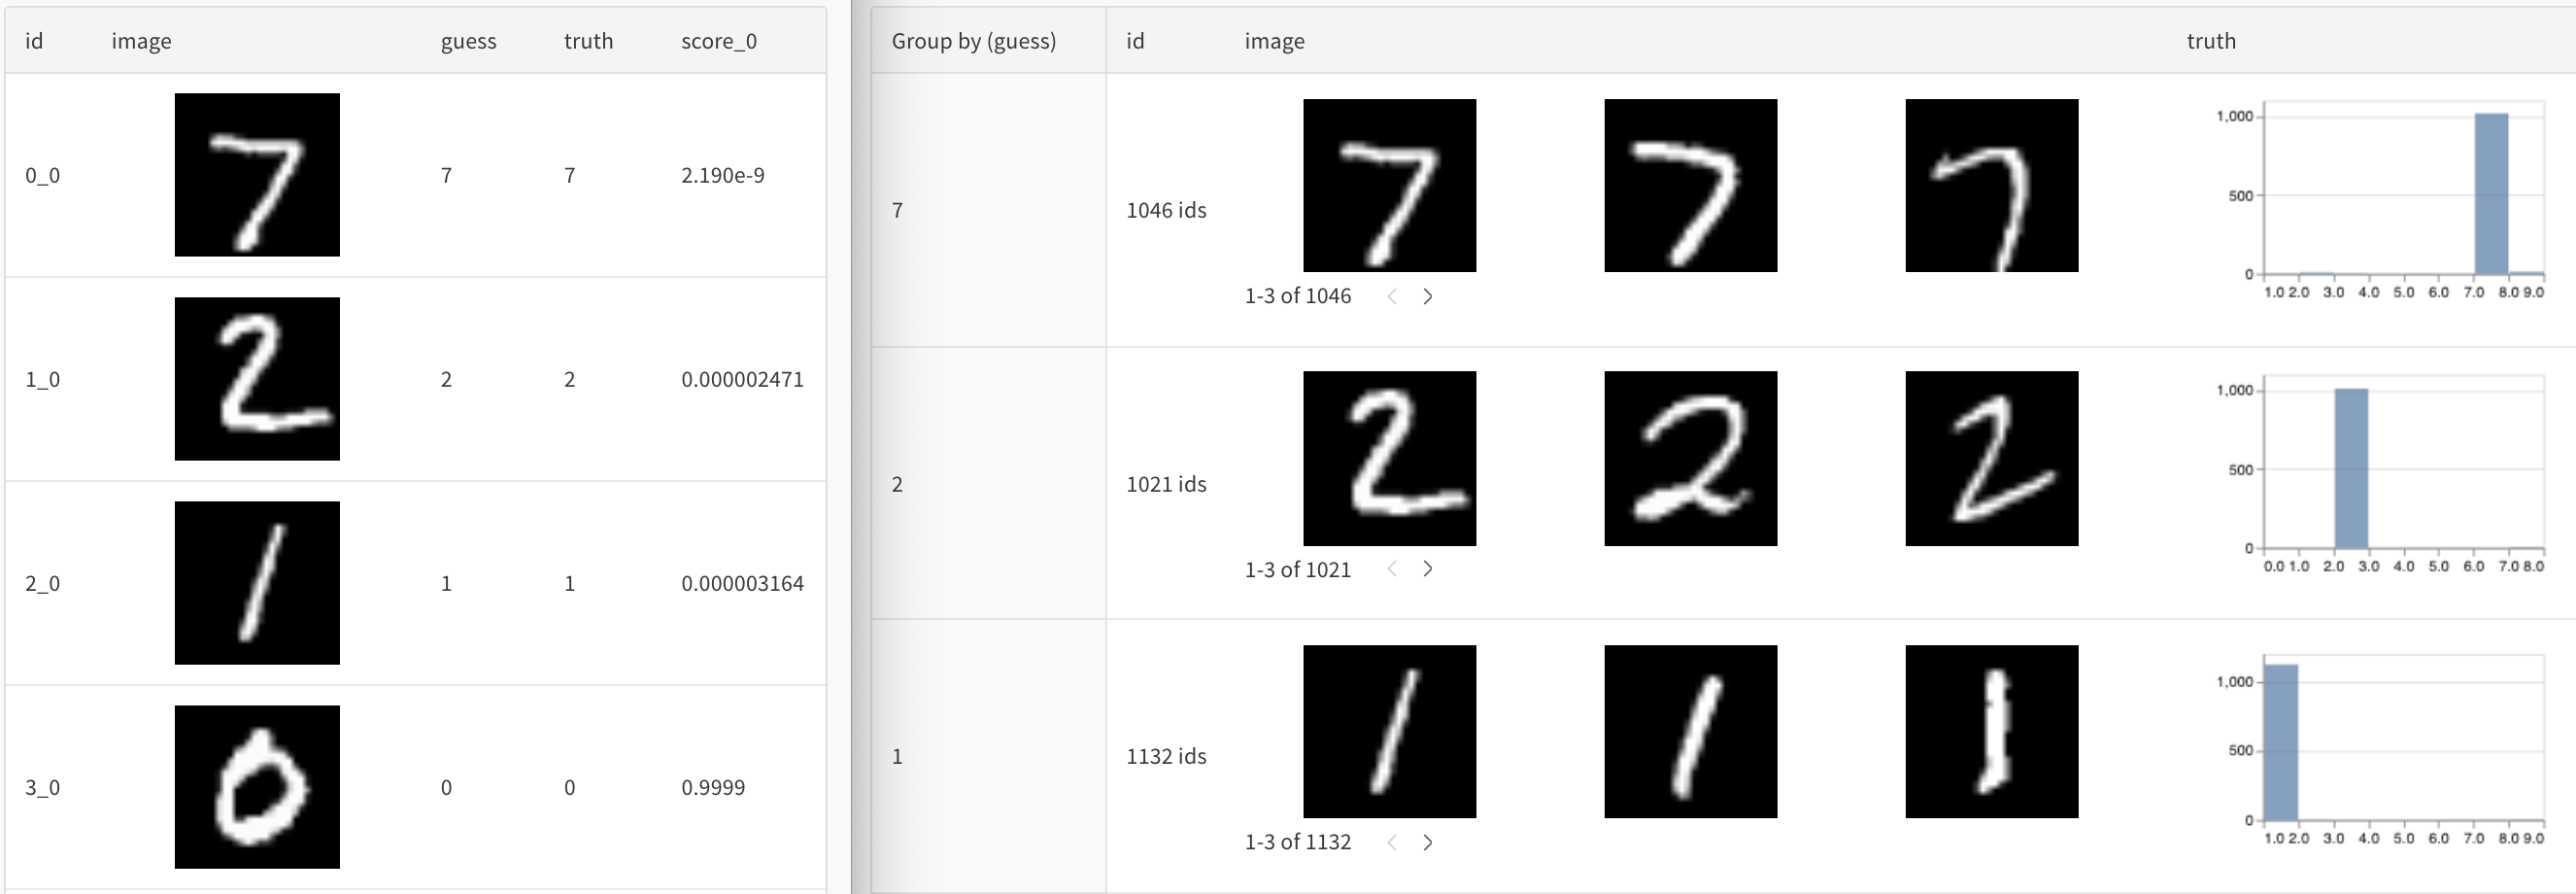

## Changing the columns

### Add columns

从任何列的三点菜单中，您可以在左侧或右侧插入新列。编辑单元格表达式，以便在对行分组时使用对现有列、数学和逻辑运算符以及聚合函数的引用来计算新列（如平均值、和、最小/最大值）。可选地在表达式编辑器下方给列一个新名称。

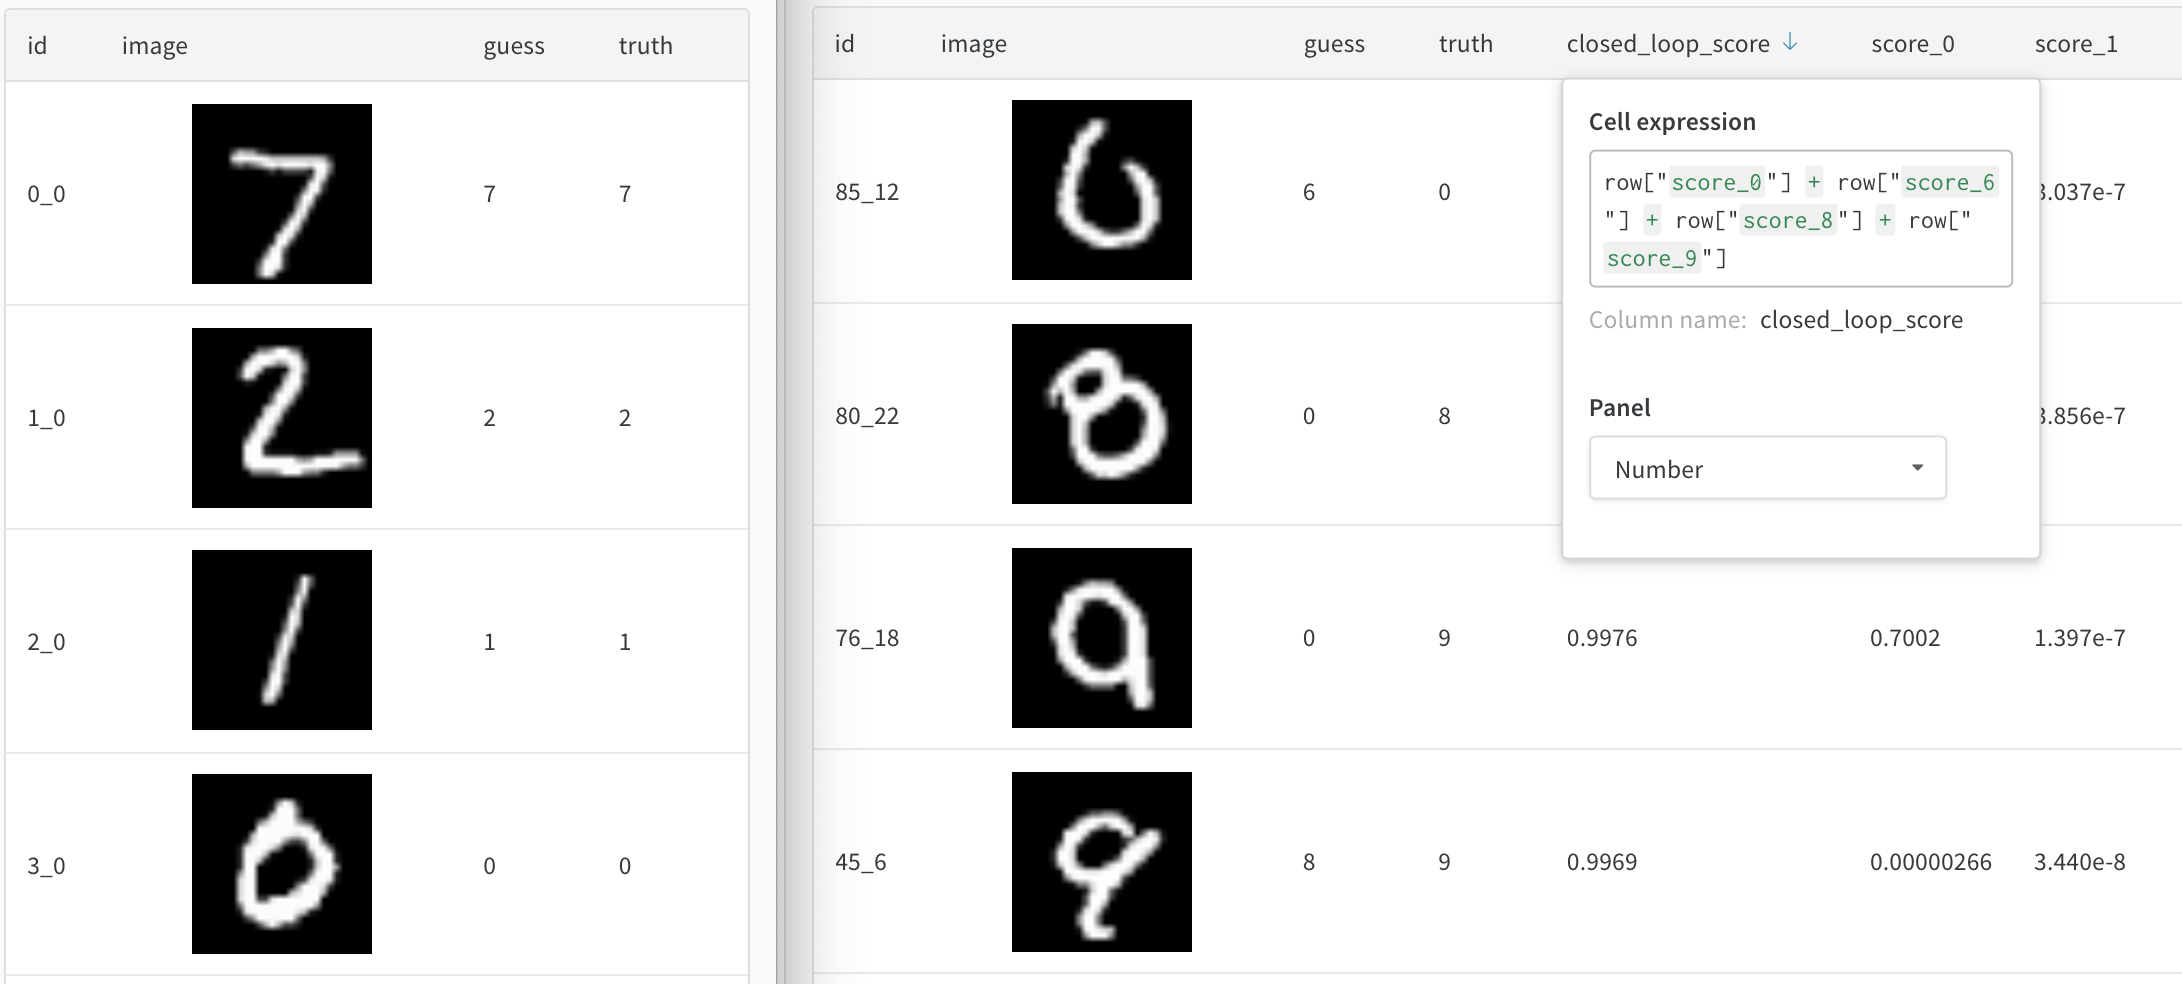

### Edit columns and display settings

表根据该列中记录的值类型呈现列数据。通过单击三点菜单中的列名或“列设置”，您可以修改:

- 通过编辑 “Cell expression” 来显示该列的内容：选择不同的字段进行显示，或构建上述逻辑谓词表达式，包括添加 count() 或 avg() 等函数以应用于内容。
- the column type: 在直方图、值数组、数字、文本等之间转换。W&B将尝试根据数据内容猜测类型。
- the pagination: 选择在分组行中一次查看多少个对象
- 列标题中的显示名称

### Remove columns

选择 “Remove” 以删除列。


## Table comparison

上述所有操作也在 Table comparison 的背景下工作。

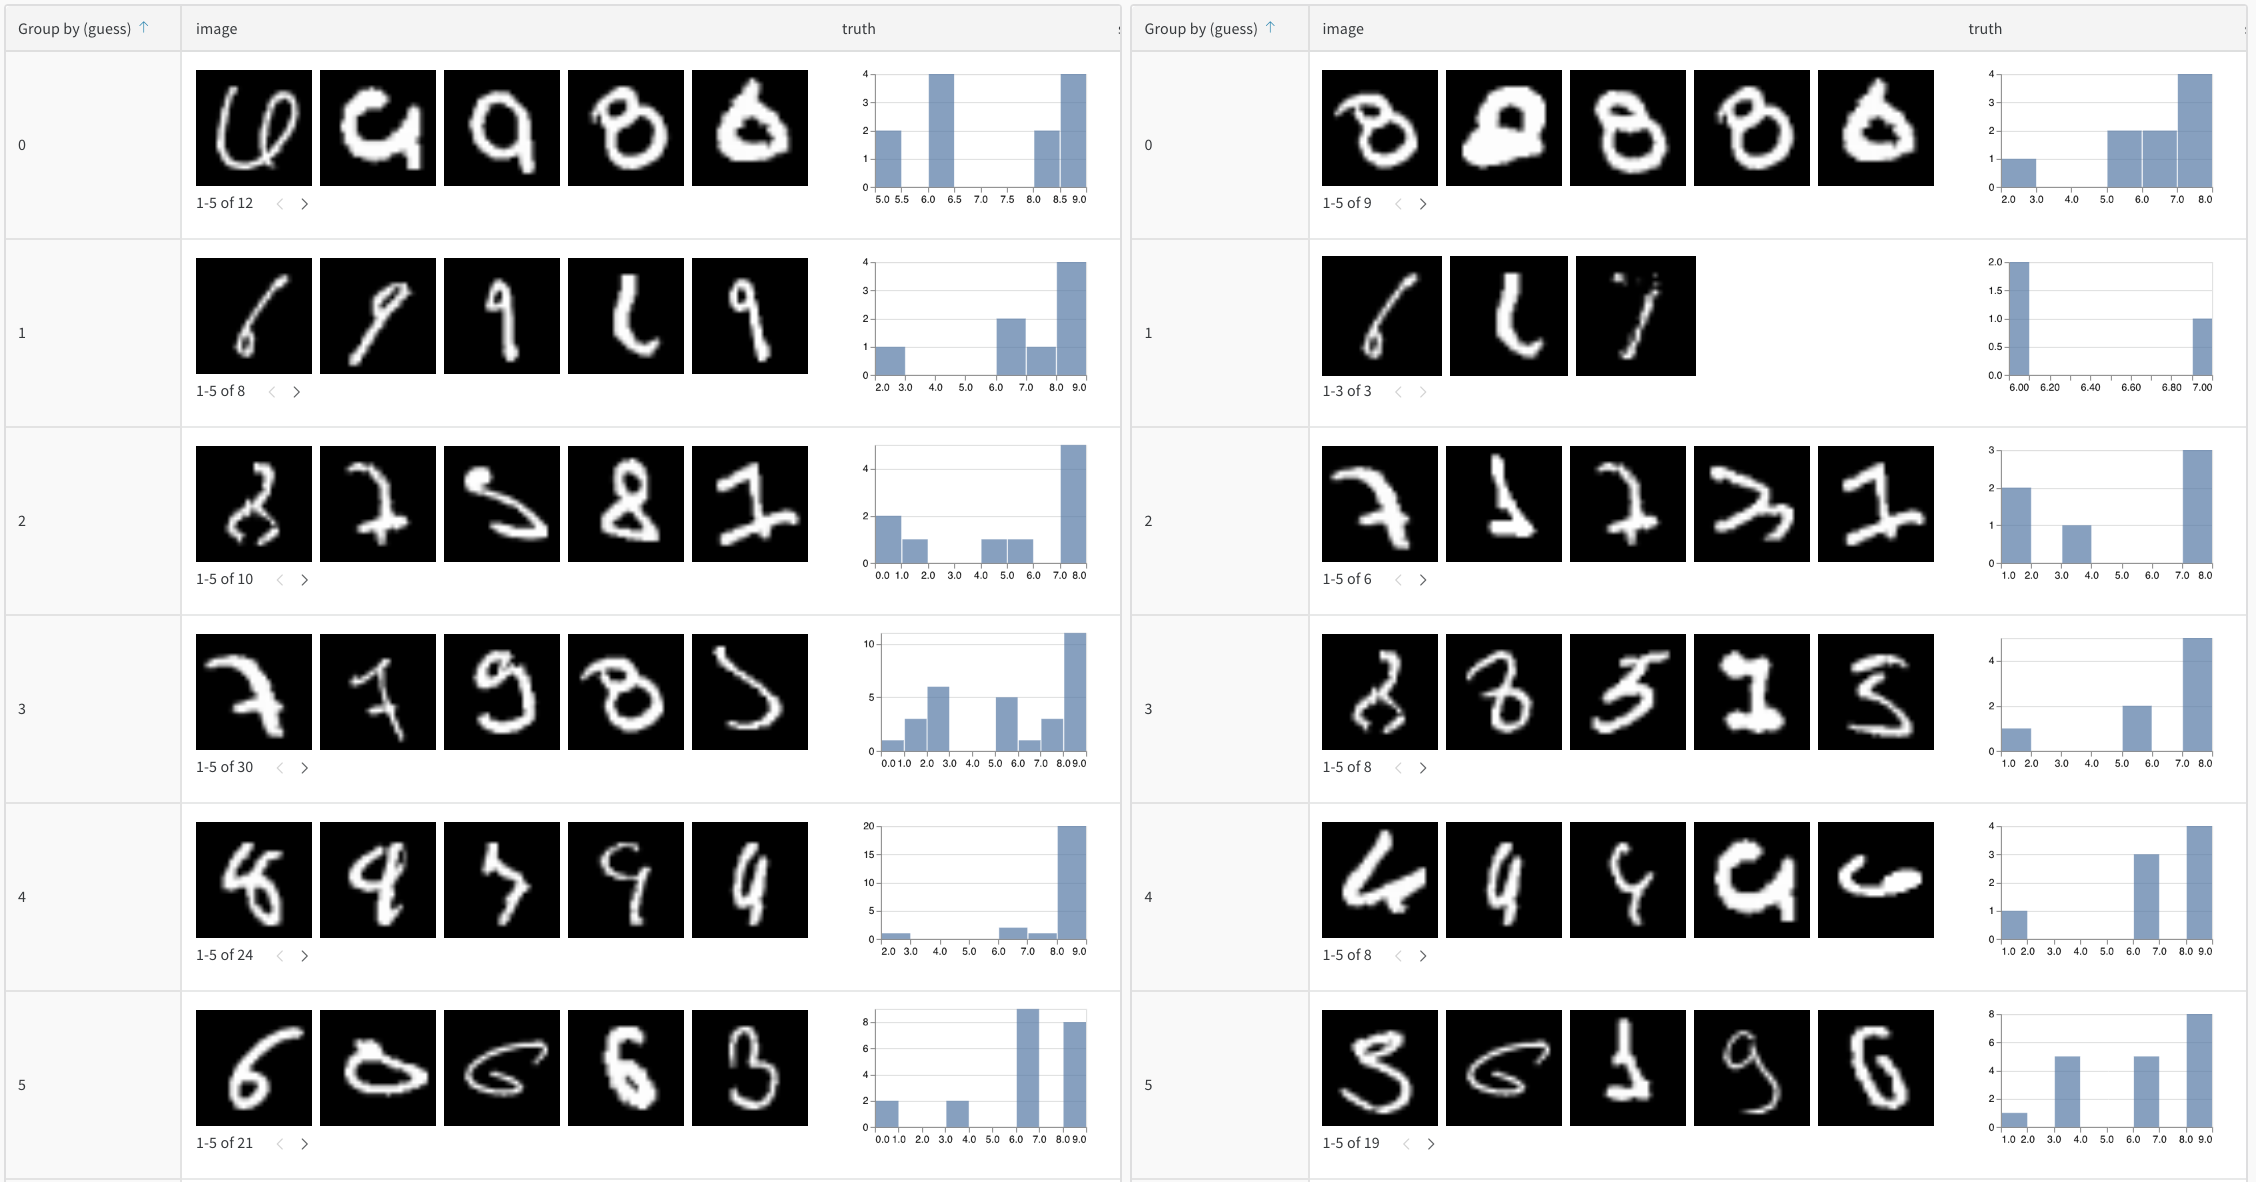


### From the UI

要比较两个表，请首先查看一个与 artifact 一起记录的表。在这里，我记录了一个模型在五个 epoch 之后对MNIST 验证数据的预测

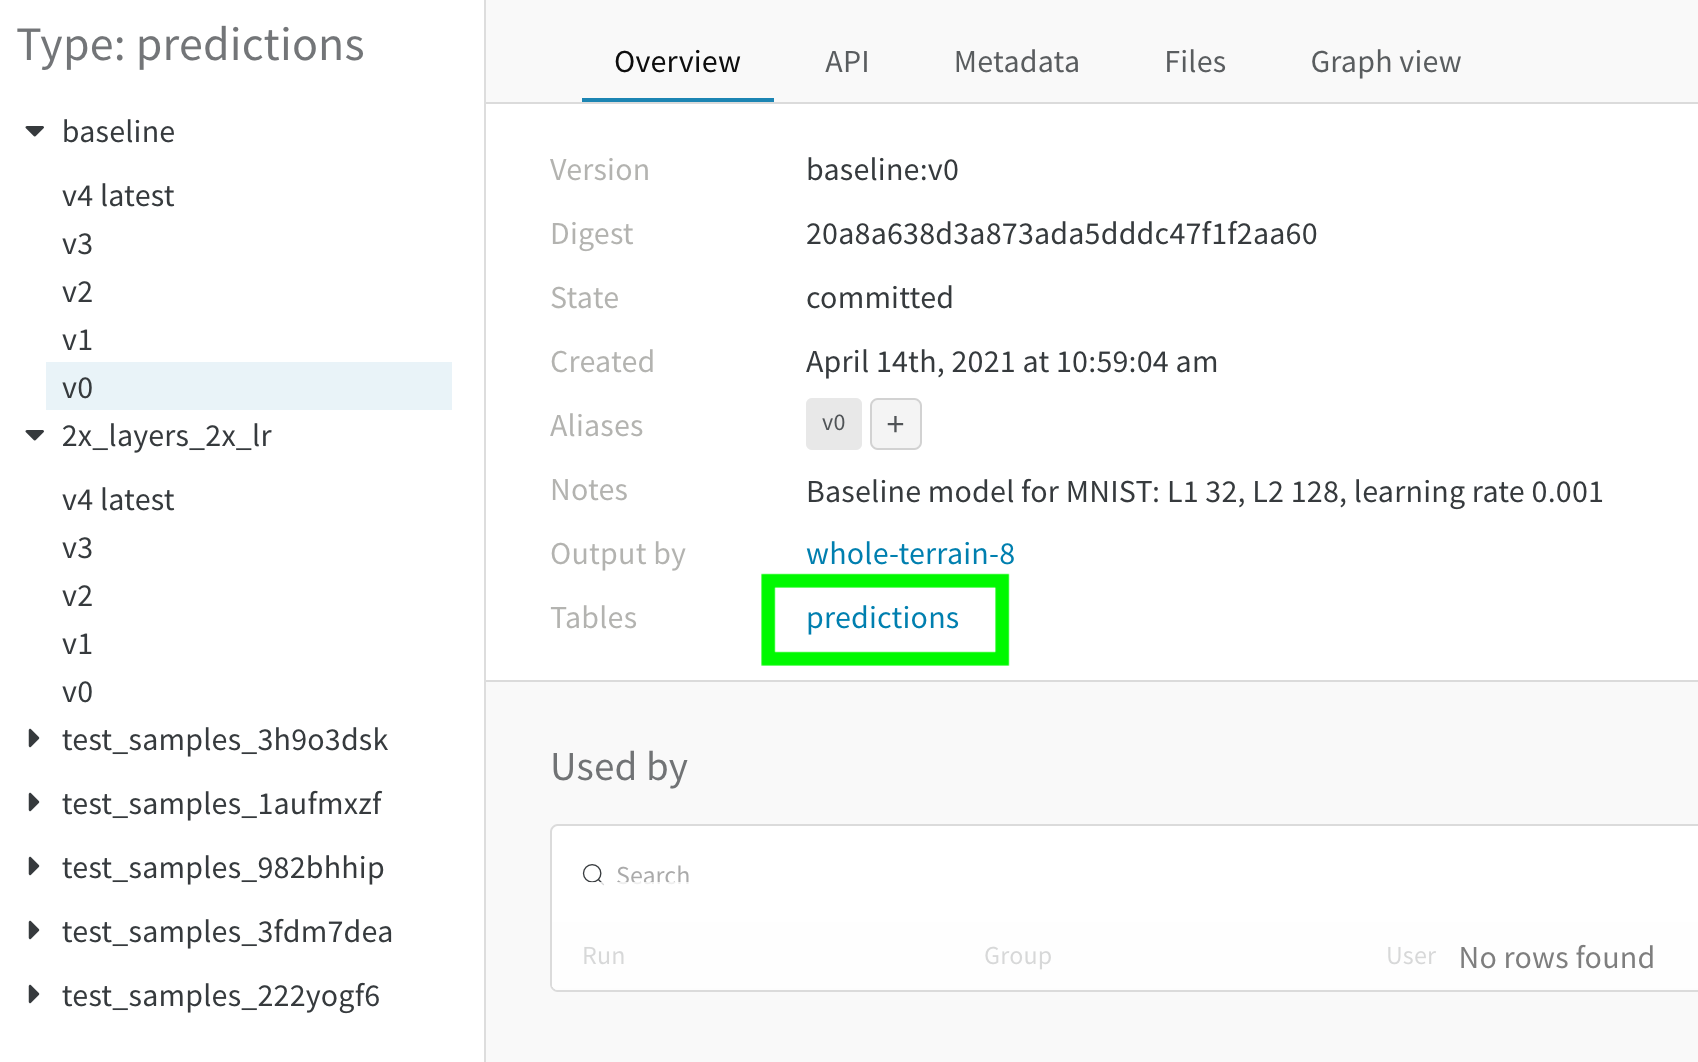

接下来，选择不同的工件版本进行比较——例如，“v4”，以比较同一模型在5个训练后做出的MNIST预测。将鼠标悬停在边栏中的第二个工件版本上，并在出现时单击“比较”。

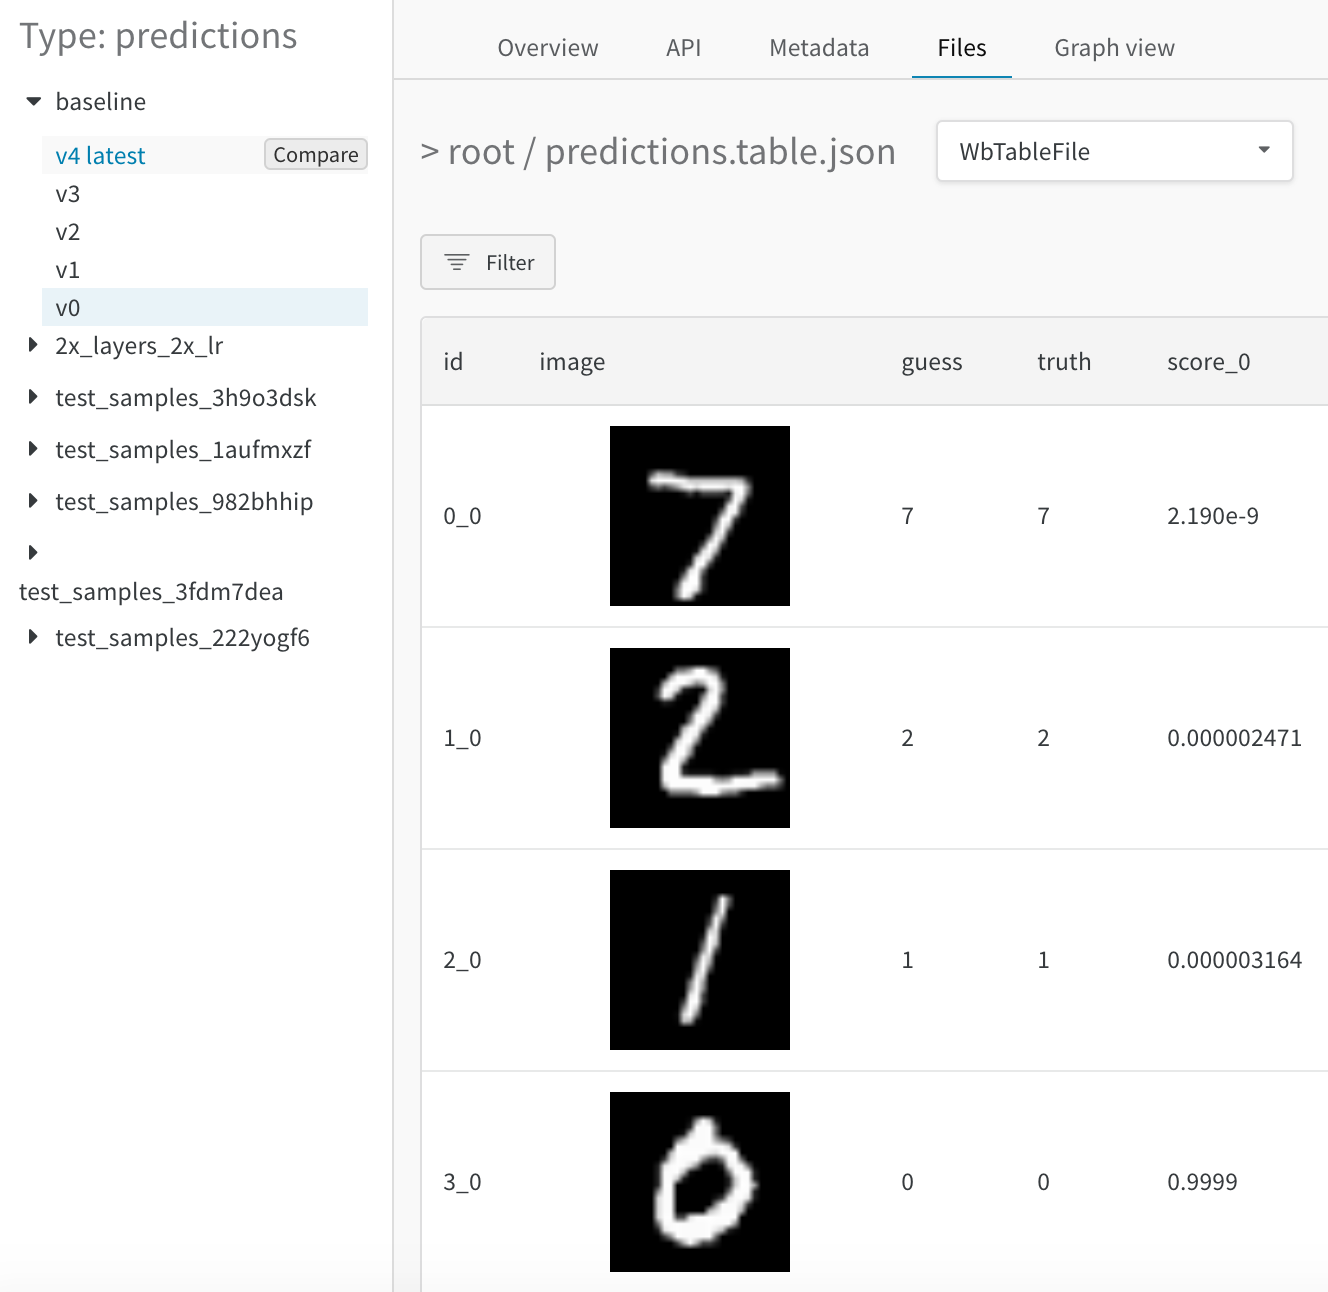


#### Merged view

最初，您将看到两个表格合并在一起。选择的第一个表有索引 0 和 blue highlight，第二个表有索引 1 和yellow highlight.

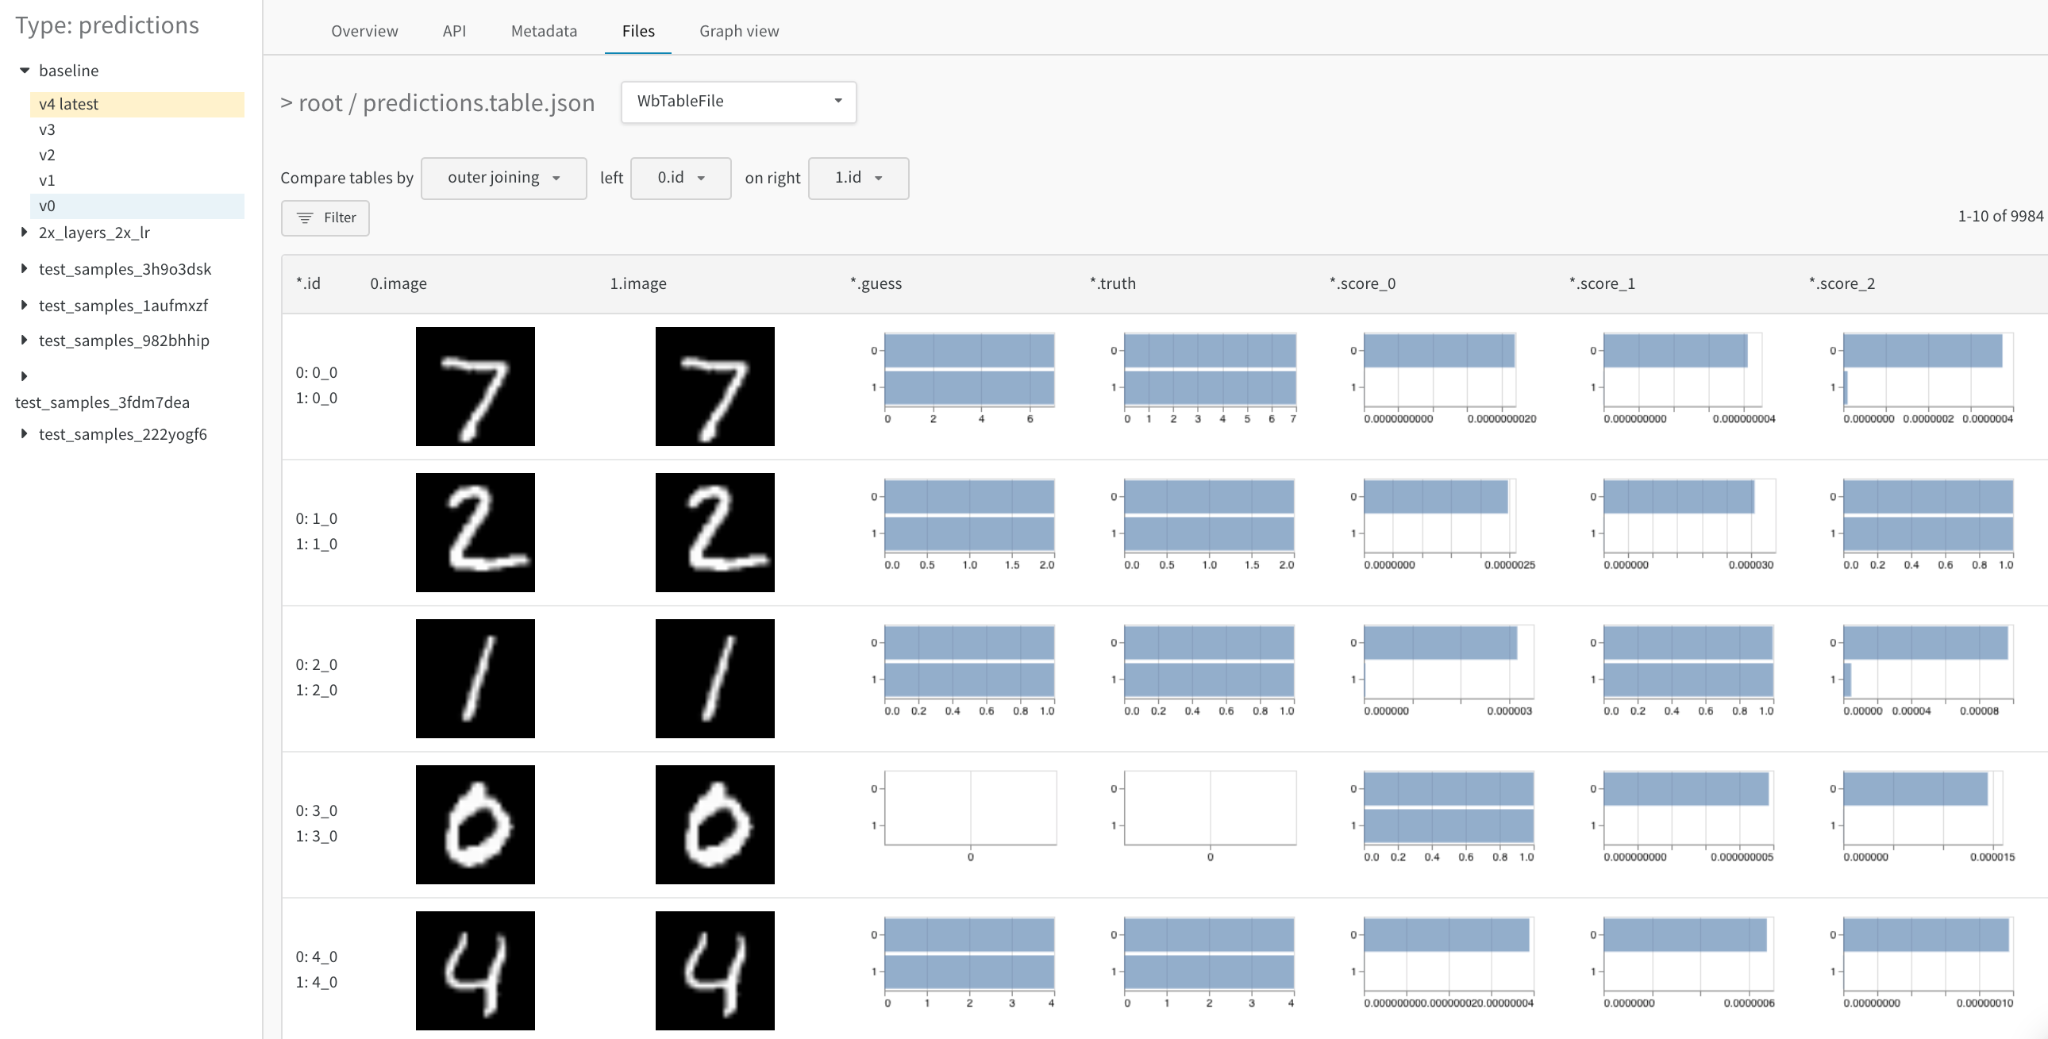

从合并视图来看，您可以

- **choose the join key**: 使用左上角的下拉菜单将列设置为两个表的  join key。通常，这将是每行的唯一标识符，例如数据集中特定示例的文件名或生成样本上的增量索引。请注意，目前可以选择任何列，这可能会产生难以辨认的表和缓慢的查询。
- **concatenate instead of join**: 在此下拉列表中选择 “concatenating all tables”，将两个表中的所有行合并到一个更大的表中，而不是跨列连接
- **reference each Table explicitly**: 在 filter expression 中使用0、1 和 * 显式指定一个或两个表实例中的列
- **visualize detailed numerical differences as histograms:** 一目了然地比较任何单元格中的值

#### Side-by-side view

要并排查看两个表格，请将第一个下拉菜单从 “Merge Tables: Table” 更改为 “List of: Table”，然后分别更新“Page size”。这里选择的第一个表在左边，第二个表在右边。此外，您也可以通过单击 “垂直” 复选框垂直比较这些表格。

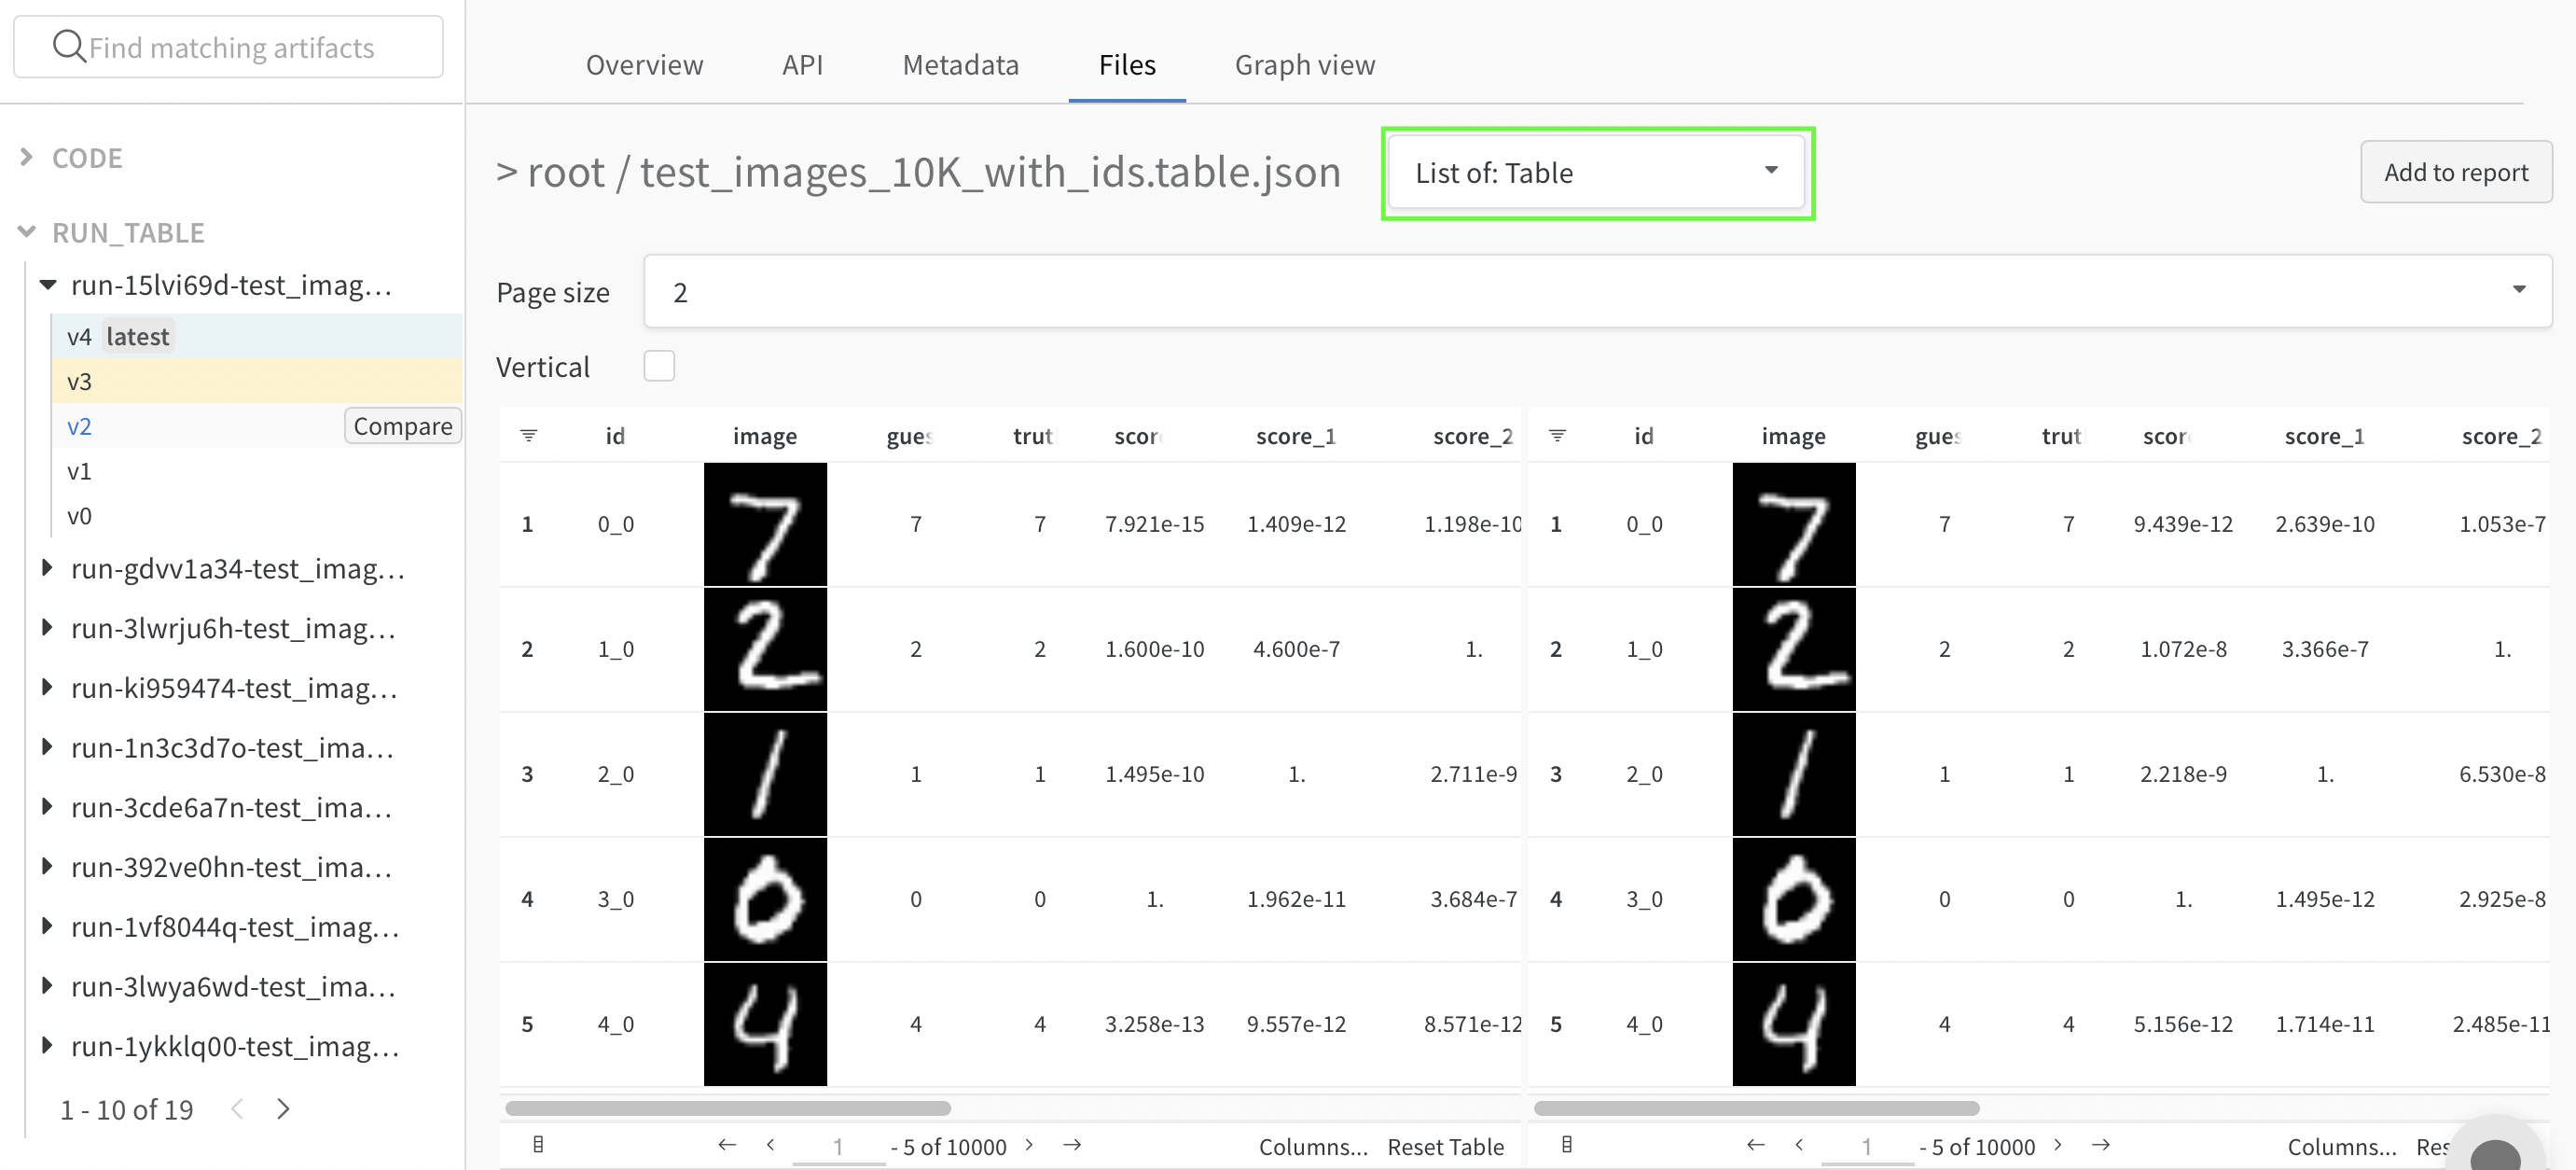

- **compare the Tables at a glance:** 将任何操作（排序、筛选、组）同时应用于两个表，并快速发现任何变化或差异。例如，查看按猜测分组的不正确预测、总体最难的否定值、按真实标签划分的置信度分数分布等。
- **explore two Tables independently:** 滚动浏览并专注于感兴趣的侧面/行

## Compare across time

要分析训练时间的模型性能，请在每个有意义的训练步骤的 artifact 上下文中记录 table：在每个验证 step 结束时，每50个训练后，或任何对 pipeline 有意义的频率。使用并排视图可视化模型预测的变化。

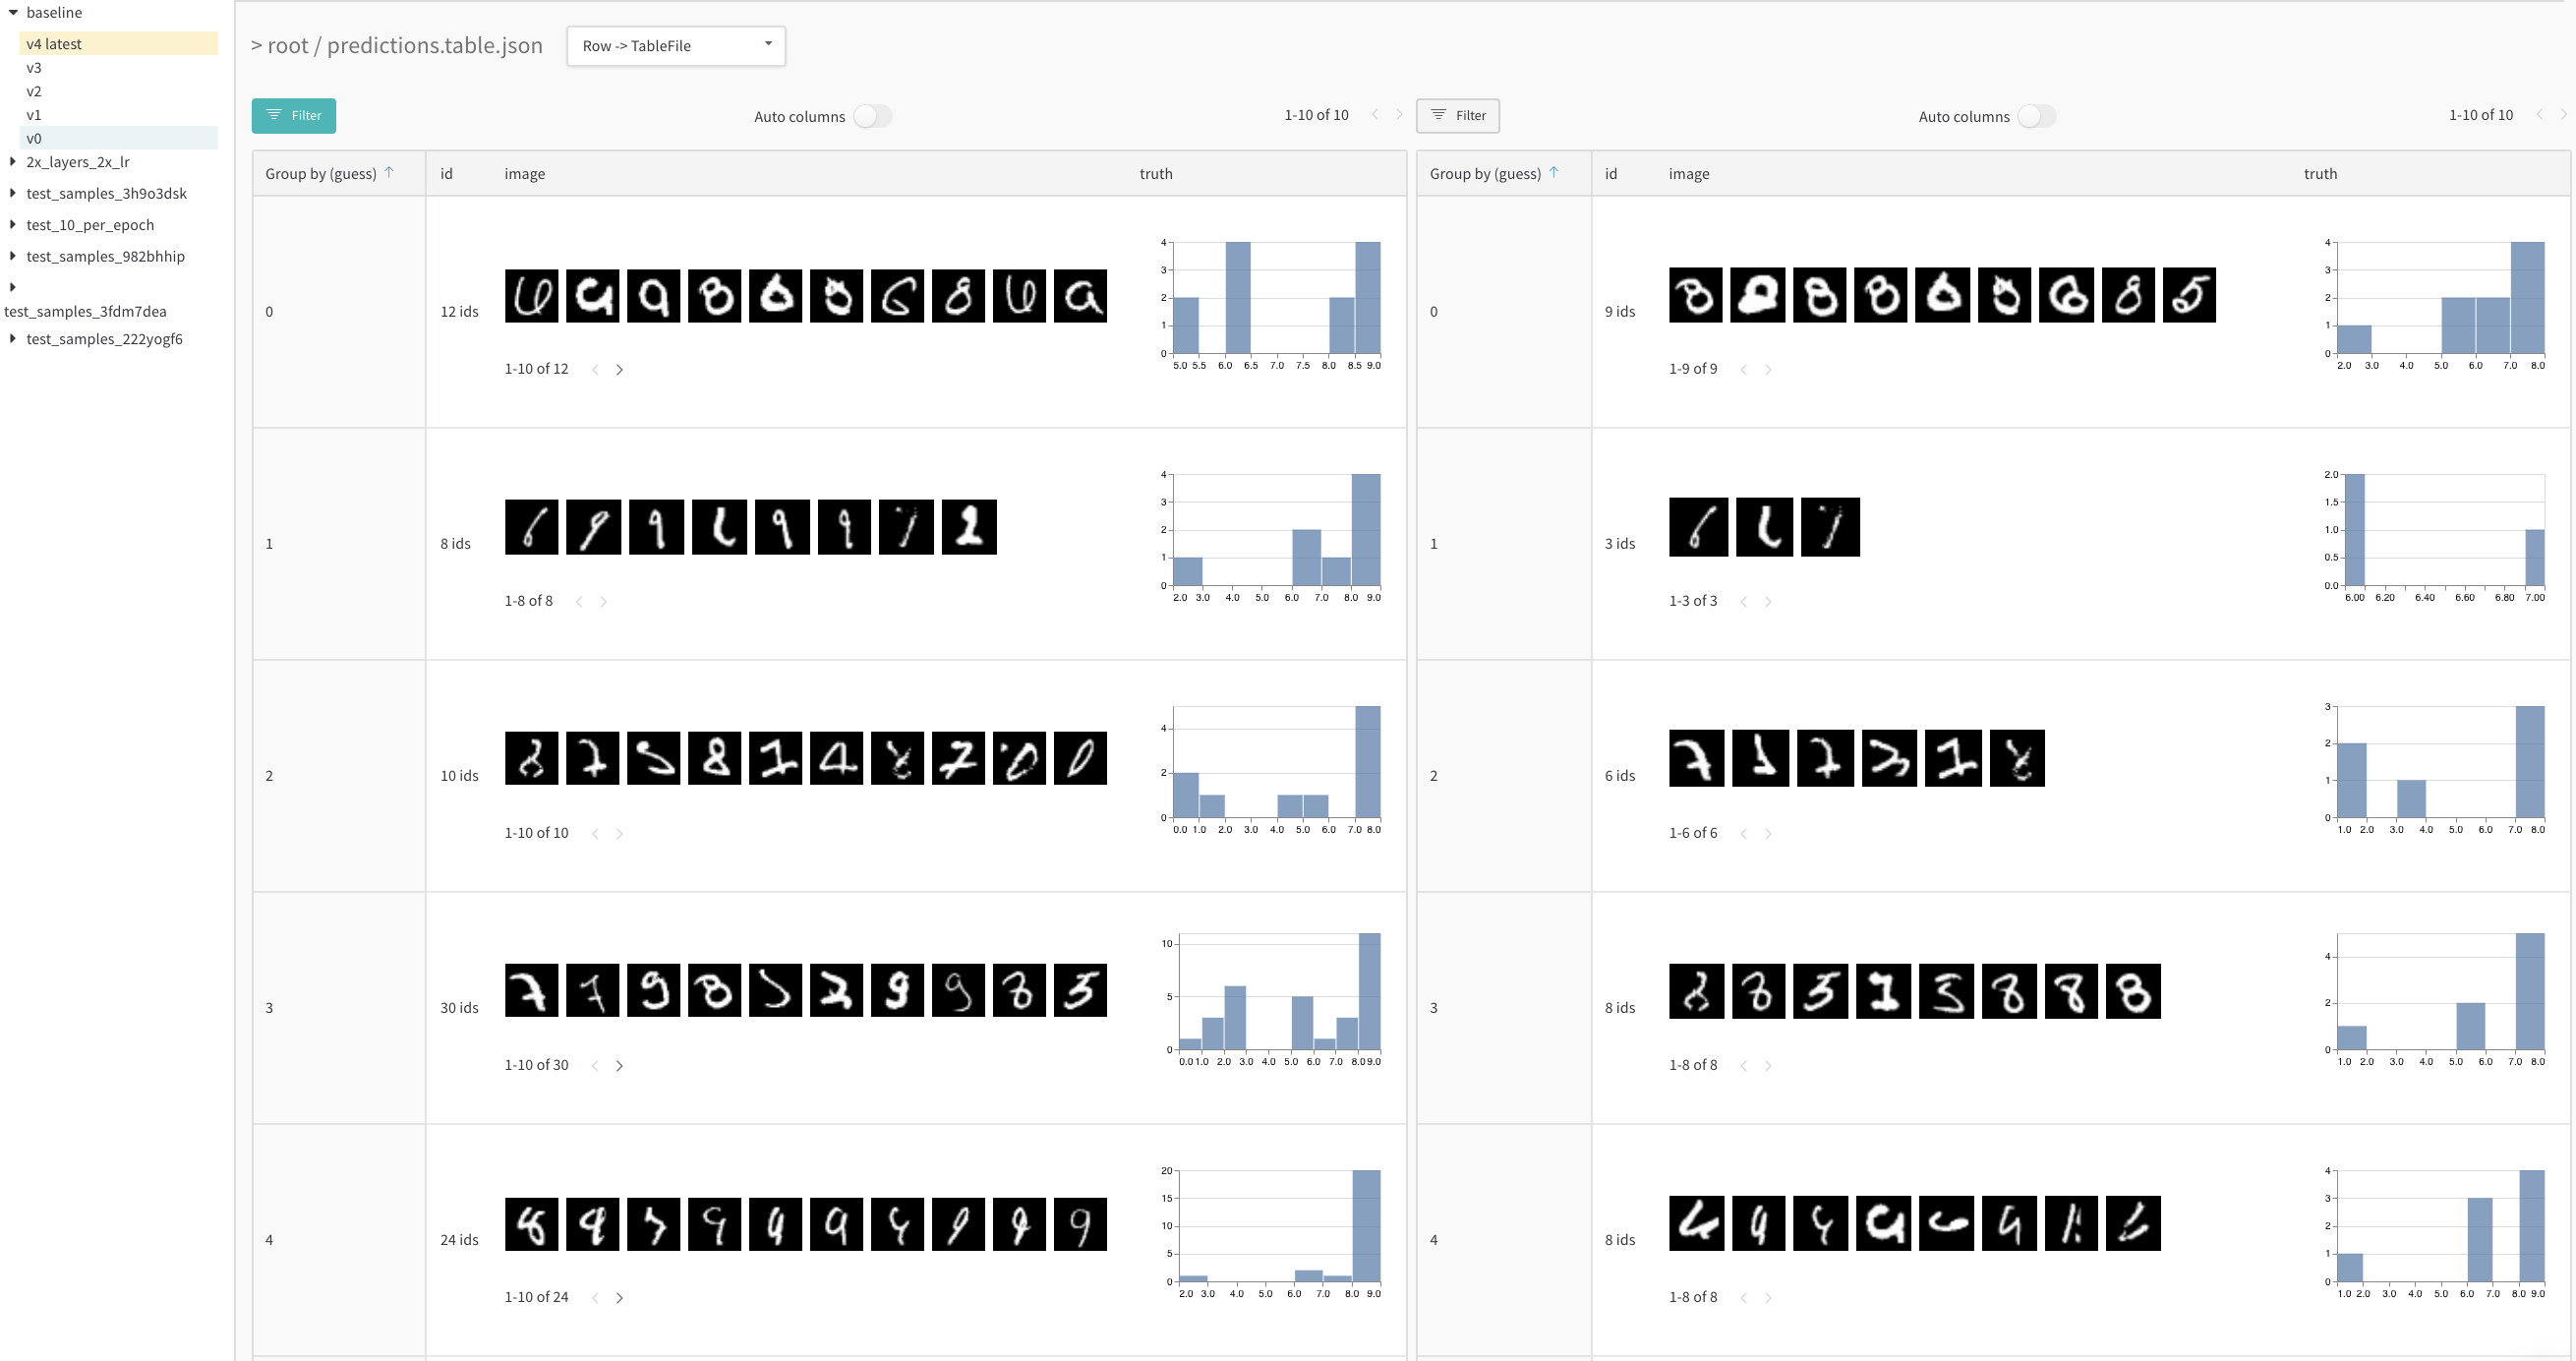

## Compare across model variants

要分析不同配置（超参数、基本架构等）的模型性能，请比较两个不同模型在同一步骤下记录的两个 artifact 版本。例如，比较基线和新模型变体 `2x_layers_2x_lr` 之间的预测，其中第一个卷积层从 32 翻倍到 64，第二个从 128 增加到 256，学习率从 0.001 增加到 0.002。从这个实时示例中，使用并排视图，过滤到1个（左选项卡）和5个训练 epoch（右选项卡）后的错误预测。

这是一个模型比较的玩具例子，但它说明了您可以使用表进行探索性分析的简单性、灵活性和深度——而无需重新运行任何代码、编写新的一次性脚本、生成新的图表等。

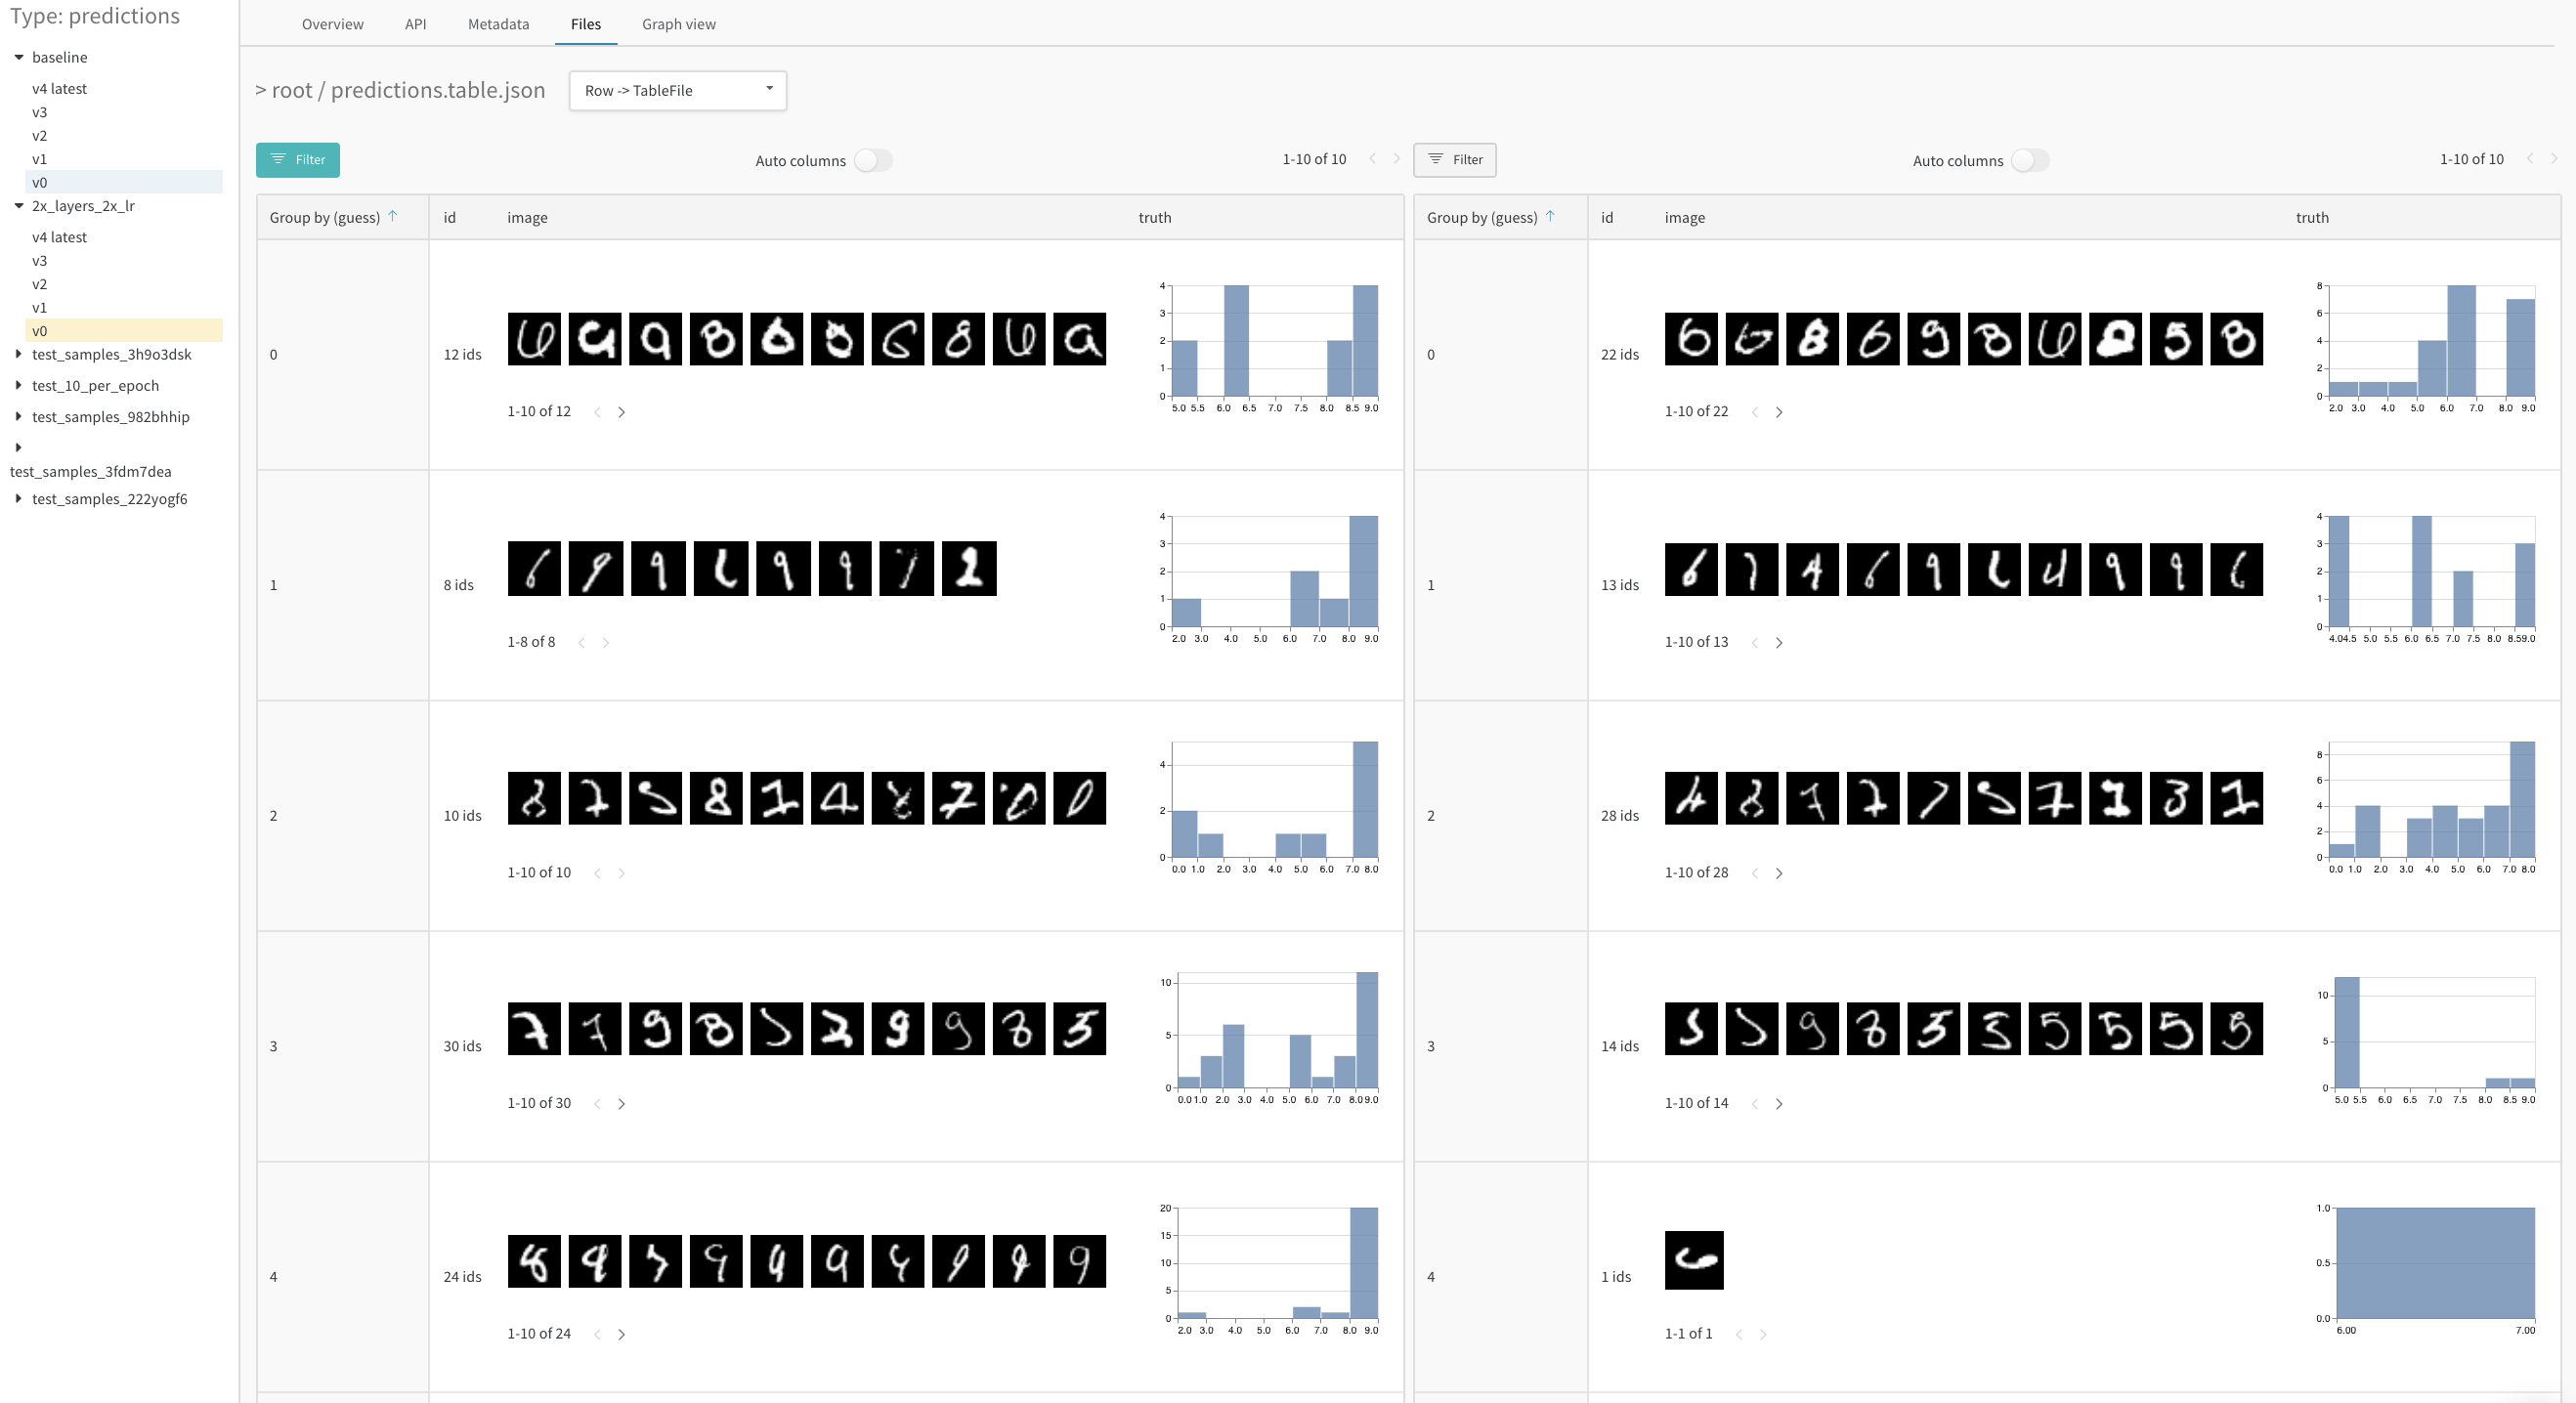